# Numerisk derivasjon

**TMA4400 Matematikk 1: Kalkulus og lineær algebra**

Dato: **06. oktober 2025**

For en funksjon $f:D_f\to\mathbb{R}$ er den deriverte definert til å være

$$
f'(x)=\lim_{h\to0}\frac{f(x+h)-f(x)}{h}.
$$

Vi ser derfor at

$$
f'(x)\approx\frac{f(x+h)-f(x)}{h}.
$$


### Eksempel

La $f(x)=e^x$ og $x_0=1.5$. Da er $f'(x)=e^x$ og vi får følgende tabell:

| $h$ | $f'(x_0)$ | $\frac{f(x_0+h)-f(x_0)}{h}$ | $\text{Feil}$ |
|:------: | :------: | :------: | :------: |
|$10^{-1}$ | $4.4817$ | $4.7134$ | $2\cdot 10^{-1}$ |
|$10^{-2}$ | $4.4817$ | $4.5042$ | $2\cdot 10^{-2}$ |
|$10^{-3}$ | $4.4817$ | $4.4839$ | $2\cdot 10^{-3}$ | 

Det er her tydelig at feilen er proposjonal med $h$.

## Numerisk derivasjon

Vi trenger litt hjelp fra Taylors teorem:

---

**Teorem.**  Anta at $f(x)$ og dens deriverte av orden $k\in\{1,2,3,4\}$, $f^{(k)}(x)$, er kontinuerlige på et åpent intervall $I$ om punktet $x=x_0$. Da er  

$$
f(x)=f(x_0)+f'(x_0)(x-x_0)+\frac{f''(x_0)}{2!}(x-x_0)^2+\frac{f^{(3)}(x_0)}{3!}(x-x_0)^3+R_3(x),\qquad \text{for alle $x\in I$},
$$

hvor 

$$
R_3(x)=\frac{f^{(4)}(c)}{4!}(x-x_0)^4, \qquad \text{for en $c$ mellom $x$ og $x_0$.}
$$

---

Bytt nå ut $x$ med $x+h$ og $x_0$ med $x$ i teoremet over. Da ser vi at

$$
\frac{f(x+h)-f(x)}{h}-f'(x)=\frac{h}{2}f''(c),
$$

eller

$$
|\text{Feil}|\leq \frac{h}{2}|f''(c)|\leq \frac{h}{2}\max_{x\in I}|f''(x)|\leq Ch.
$$

Vi sier at vi har første ordens tilnærming av den deriverte når $|\text{Feil}|\leq C h$.

Ved å kombinere Taylors teorem på ulike måter får vi for eksempel også at

$$
\frac{f(x+h)-f(x-h)}{2h}-f'(x)=-\frac{h^2}{12}\left(f^{(3)}(c_1)+f^{(3)}(c_2)\right).
$$

Her vil altså $|\text{Feil}|\leq C h^2$, eller andre ordens tilnærming av den deriverte. Og slik kan man fortsette for å få høyere ordens tilnærminger. Men jo høyere orden på tilnærmingen, jo høyere ordens deriverte trenger vi.

La oss teste teorien med litt koding i python.

Actual value 4.4816890703380645
h = 0.1
Divided difference = 4.713433540570504, Error = 0.2317444702324396
Symmetric difference = 4.489162287752202, Error = 0.007473217414137423
h = 0.01
Divided difference = 4.5041723976187775, Error = 0.022483327280713006
Symmetric difference = 4.481763765529401, Error = 7.469519133618263e-05
h = 0.001
Divided difference = 4.483930662008362, Error = 0.0022415916702973604
Symmetric difference = 4.481689817286139, Error = 7.469480740596168e-07
h = 0.0001
Divided difference = 4.481913162264206, Error = 0.00022409192614158968
Symmetric difference = 4.48168907780655, Error = 7.468485385686563e-09


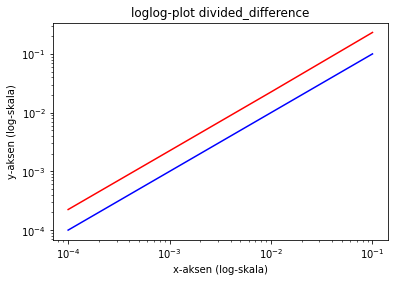

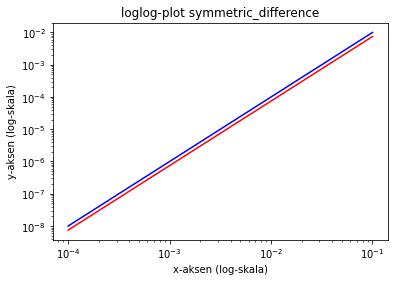

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def f(x):                            # definerer funksjonen selv
    return math.exp(x)

def f_prime(x):                      # definerer den deriverte
    return math.exp(x)

def first_order(x_0, h):             # definerer første ordens approksimasjon
    return (f(x_0+h)-f(x_0)) / h

def second_order(x_0, h):            # definerer andre ordens approksimasjon
    return (f(x_0+h)-f(x_0-h)) / (2*h)

x_0 = 1.5                            # punktet vi er interessert i
actual = f_prime(x_0)                # faktisk verdi i dette punktet

print("Actual value " + str(actual))
print("============================================")

i = 0
divided_difference = np.zeros(4)
symmetric_difference = np.zeros(4)
error_d = np.zeros(4)
error_s = np.zeros(4)

for h in [0.1, 0.01, 0.001, 0.0001]: # vi lar h være mindre og mindre, men positiv
    
    print("h = " + str(h))

    divided_difference[i] = first_order(x_0, h)
    symmetric_difference[i] = second_order(x_0, h)
    error_d[i] = abs(divided_difference[i] - actual)
    error_s[i] = abs(symmetric_difference[i] - actual)
    
    print("Divided difference = {:>12}, Error = {:>12}".format(str(divided_difference[i]), str(error_d[i])))
    print("Symmetric difference = {:>12}, Error = {:>12}".format(str(symmetric_difference[i]), str(error_s[i])))
    print("============================================")
    
    i = i+1

# vi ønsker nå å sjekke om ordenen til divided_difference faktisk er lineær

def g(x):                      # definerer den lineære funksjonen
    return x**1

# vi lager et loglog-plot hvor vi skal få rett linje dersom ordenen er lik 1
plt.loglog([0.1, 0.01, 0.001, 0.0001], error_d, 'r')
plt.loglog([0.1, 0.01, 0.001, 0.0001], [g(0.1), g(0.01), g(0.001), g(0.0001)], 'b')
plt.title('loglog-plot divided_difference')
plt.xlabel('x-aksen (log-skala)')
plt.ylabel('y-aksen (log-skala)')
plt.show()
    
# vi ønsker nå å sjekke om ordenen til symmetric_difference faktisk er kvadratisk

def h(x):                      # definerer den kvadratiske funksjonen
    return x**2

# vi lager et loglog-plot hvor vi skal få rett linje dersom ordenen er lik 2
plt.loglog([0.1, 0.01, 0.001, 0.0001], error_s, 'r')
plt.loglog([0.1, 0.01, 0.001, 0.0001], [h(0.1), h(0.01), h(0.001), h(0.0001)], 'b')
plt.title('loglog-plot symmetric_difference')
plt.xlabel('x-aksen (log-skala)')
plt.ylabel('y-aksen (log-skala)')
plt.show()